In [1]:
#Importing libraries
import pandas as pd 
from datetime import datetime

In [2]:
#Reading data
df = pd.read_csv('3131.csv')
df

,datetime,open,high,low,close,volume
0,2006-01-02,4566.95,4601.35,4542.00,4556.25,0.0
1,2006-01-03,4531.45,4605.45,4531.45,4600.25,0.0
2,2006-01-04,4619.55,4707.60,4616.05,4694.14,0.0
3,2006-01-05,4714.20,4782.64,4670.55,4760.45,0.0
4,2006-01-06,4767.25,4802.80,4703.10,4755.60,0.0
...,...,...,...,...,...,...
3443,2019-12-18,32292.25,32293.65,32017.30,32244.25,0.0
3444,2019-12-19,32281.65,32328.35,32085.05,32241.45,0.0
3445,2019-12-20,32266.85,32443.35,32199.45,32384.95,0.0
3446,2019-12-23,32381.00,32502.80,32196.85,32339.45,0.0


In [18]:
#Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3448 entries, 0 to 3447
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  3448 non-null   object 
 1   open      3448 non-null   float64
 2   high      3448 non-null   float64
 3   low       3448 non-null   float64
 4   close     3448 non-null   float64
 5   volume    3448 non-null   float64
dtypes: float64(5), object(1)
memory usage: 161.8+ KB


In [9]:
#Groupby wrt Year and month and extract the last day for the corresponding month
maxi = df.groupby(pd.to_datetime(df.datetime).dt.strftime('%Y-%m'))['datetime'].max()
maxi

datetime
2006-01    2006-01-31
2006-02    2006-02-28
2006-03    2006-03-31
2006-04    2006-04-29
2006-05    2006-05-31
              ...    
2019-08    2019-08-30
2019-09    2019-09-30
2019-10    2019-10-31
2019-11    2019-11-29
2019-12    2019-12-24
Name: datetime, Length: 168, dtype: object

In [10]:
#Groupby wrt Year and month and extract the first day for the corresponding month
mini = df.groupby(pd.to_datetime(df['datetime']).dt.strftime('%Y-%m'))['datetime'].min()
mini

datetime
2006-01    2006-01-02
2006-02    2006-02-01
2006-03    2006-03-01
2006-04    2006-04-03
2006-05    2006-05-02
              ...    
2019-08    2019-08-01
2019-09    2019-09-03
2019-10    2019-10-01
2019-11    2019-11-01
2019-12    2019-12-02
Name: datetime, Length: 168, dtype: object

In [12]:
#Calculating return for all months
#Returns = Close(last day) - Open(first day) for a particular month
df3 = pd.DataFrame(index = mini.index, columns = ['Returns'])
for index in mini.index:
    v1 = df[df.datetime == mini[index]]['open'].values[0]
    v2 = df[df.datetime == maxi[index]]['close'].values[0]
    diff = v2 - v1
    df3.loc[index,'Returns'] = diff
df3

,Returns
datetime,
2006-01,50.65
2006-02,-43.25
2006-03,139.8
2006-04,-111.7
2006-05,-434.7
...,...
2019-08,-1232.65
2019-09,1863.95
2019-10,840.1


In [13]:
final = pd.DataFrame(columns = ['Year', 'Month', 'Returns'])
for i in range(0,len(df3)):
    final.loc[i,'Year'] = df3.index[i].split('-')[0]
    final.loc[i,'Month'] = df3.index[i].split('-')[1]
    final.loc[i,'Returns'] = df3.loc[df3.index[i],"Returns"]

In [14]:
final

,Year,Month,Returns
0,2006,01,50.65
1,2006,02,-43.25
2,2006,03,139.8
3,2006,04,-111.7
4,2006,05,-434.7
...,...,...,...
163,2019,08,-1232.65
164,2019,09,1863.95
165,2019,10,840.1
166,2019,11,1749.95


In [15]:
#Convert datatypes of columns
final = final.astype({'Year':'int', 'Month':'int', 'Returns':'float'})

In [16]:
#Create a pivot dataFrame
final = final.pivot("Year", "Month", "Returns")
final

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2006,50.65,-43.25,139.80,-111.70,-434.70,-421.95,361.05,520.70,683.05,311.65,405.50,-208.90
2007,-61.20,-735.95,46.15,353.30,668.25,399.20,116.60,-228.00,1329.60,1004.60,155.35,472.25
2008,-593.25,-631.90,-1805.60,922.30,-1189.75,-1550.25,687.95,446.70,-267.35,-1353.85,-500.66,683.75
2009,-562.65,-511.49,301.95,977.40,2124.75,-220.45,219.40,-132.40,1352.75,-396.69,674.85,-26.54
2010,-380.36,125.30,632.70,406.20,-445.70,132.75,757.05,488.00,1604.70,-60.15,-532.90,-196.25
2011,-1240.25,-248.10,1163.50,-229.30,-488.45,233.45,-466.30,-1480.75,-239.16,657.05,-1334.30,-904.14
2012,1909.60,472.30,-172.40,90.00,-841.70,906.20,17.60,-357.29,1425.95,-193.30,892.40,347.65
2013,158.65,-1231.20,-171.20,1146.60,-79.05,-836.15,-1581.70,-1080.90,505.00,1788.00,-318.25,204.95
2014,-1181.15,559.25,2036.60,49.70,1873.05,455.45,-21.20,602.80,-398.00,1674.35,1426.15,149.70


<AxesSubplot:xlabel='Month', ylabel='Year'>

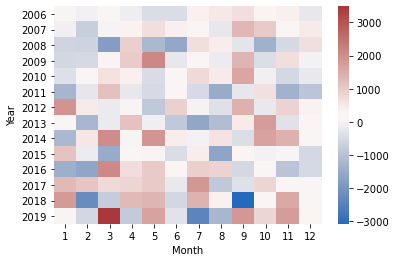

In [17]:
#Plotting heatmap
import seaborn as sns
sns.heatmap(final, cmap="vlag")